(EDA) Noise Complaints in NYC 2018
-------


![](https://bloximages.chicago2.vip.townnews.com/oneidadispatch.com/content/tncms/assets/v3/editorial/8/04/804b0ff4-d4ac-5bcf-b501-9cb659c770cd/5ba25e8185125.image.jpg?resize=600%2C450)

Introduction
-------
High volume of noise complaints are reported in New York City. 

In this brief exploratory data analysis, we will explore our data to cover the questions below:

1. What type of complaints are most frequent? 
2. What areas in NYC get the most noise complaints?
3. When do most complaints occur?

*Data has been extracted from NYC Open Data*

In [9]:
#import libraries

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.express as px

In [10]:
#read dataset
noise_complaints_data = pd.read_csv('Noise_Complaints.csv')

In [11]:
#preview data
noise_complaints_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38068836,01/01/2018 12:04:05 AM,01/01/2018 01:05:25 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11206.0,991 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.696189,-73.942217,"(40.69618859110066, -73.94221711868975)"
1,38068795,01/01/2018 12:04:34 AM,01/01/2018 01:45:45 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11378.0,57-66 63 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721666,-73.902147,"(40.72166585265354, -73.90214677465019)"
2,38065522,01/01/2018 12:04:51 AM,01/01/2018 12:44:05 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11432.0,90-82 180 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.709136,-73.780885,"(40.70913649317813, -73.78088499605603)"
3,38067938,01/01/2018 12:05:06 AM,01/01/2018 12:59:21 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11222.0,66 GREENPOINT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729797,-73.958385,"(40.729796948451764, -73.95838458100494)"
4,38071606,01/01/2018 12:05:16 AM,01/01/2018 01:19:46 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11355.0,45-15 COLDEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.750501,-73.823002,"(40.75050114108838, -73.82300178904647)"


# Basic Information & Cleaning

Let's take a look at our data. We immediately notice that we have a large set of columns (39 in total)

| Feature | Description |
| --- | --- |
| Unique Key | Unique ID of the reported complaint case |
| Created Date | The date that complaint was reported |
| Closed Date | The date that the case was closed |
| Agency  | Agency that handled the situation |
| Agency Name | Full name of the agency that handled the situation |
| Complaint Type | Type of complaint reported |
| Descriptor | Description of the complaint |
| Location Type | Type of location where the complaint was reported |
| Incident Zip | Zip code of where the complaint was reported |
| Incident Address | Mail box number and Street Address of where the complaint was reported |
| Street Name | Street name of where the complaint was reported |
| Cross Street 1 | Cross Street 1 of where the complaint was reported |
| Cross Street 2 | Cross Street 2 of where the complaint was reported |
| Intersection Street 1 | Intersection Street 1 of where the complaint was reported |
| Intersection Street 2 | Intersection Street 2 of where the complaint was reported |
| Address Type | Type of address of where the complaint was reported |
| City | City address of where the complaint was reported |
| Landmark | Landmark name of where the complaint was reported (if reported from a specific landmark) |
| Facility Type | Facility type of where the complaint was reported |
| Status | Status of the complaint (open/closed) |
| Due Date | Due date of the complaint |
| Resolution Description | How the complaint was handled by the agency |
| Resolution Action Updated Date | Date the action has been taken regarding the complaint |
| Community Board | Community Board of where the complaint took place |
| Borough | Borough in NYC where complaint was reported |
| X Coordinate (State Plane) | X coordinate of where the complaint was reported |
| Y Coordinate (State Plane) | Y coordinate of where the complaint was reported |
| Park Facility Name | Park facility name of where the complaint was reported |
| Park Borough | Park Borough of the complaint |
| Vehicle Type | N/A; Does not apply to this dataset |
| Taxi Company Borough | N/A; Does not apply to this dataset |
| Taxi Pick Up Location | N/A; Does not apply to this dataset |
| Bridge Highway Name | N/A; Does not apply to this dataset |
| Bridge Highway Direction | N/A; Does not apply to this dataset |
| Road Ramp | N/A; Does not apply to this dataset |
| Bridge Highway Segment | N/A; Does not apply to this dataset |
| Latitude | Latitude coordinate of where the complaint was reported |
| Longitude | Longitude coordinate of where the complaint was reported |
| Location | Latitude and Longitude coordinate point of where the complaint was reported |

In [12]:
#show basic information of the dataset
noise_complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436691 entries, 0 to 436690
Data columns (total 39 columns):
Unique Key                        436691 non-null int64
Created Date                      436691 non-null object
Closed Date                       436115 non-null object
Agency                            436691 non-null object
Agency Name                       436691 non-null object
Complaint Type                    436691 non-null object
Descriptor                        436691 non-null object
Location Type                     376082 non-null object
Incident Zip                      435559 non-null float64
Incident Address                  391970 non-null object
Street Name                       391970 non-null object
Cross Street 1                    394468 non-null object
Cross Street 2                    393965 non-null object
Intersection Street 1             44886 non-null object
Intersection Street 2             44468 non-null object
Address Type                      43

In [13]:
#count missing items
noise_complaints_data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                          576
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                      60609
Incident Zip                        1132
Incident Address                   44721
Street Name                        44721
Cross Street 1                     42223
Cross Street 2                     42726
Intersection Street 1             391805
Intersection Street 2             392223
Address Type                         555
City                                1132
Landmark                          436455
Facility Type                      62061
Status                                 0
Due Date                           60780
Resolution Description               174
Resolution Action Updated Date       552
Community Board                        0
Borough         

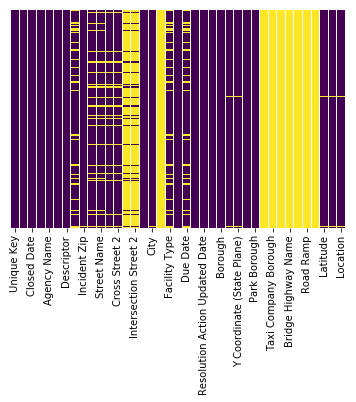

In [14]:
#plot null values on a heatmap

sns.heatmap(noise_complaints_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There many features that either have too many missing values or have repetitive information (many of which are related to location of the complaint) 

We will drop these columns along with the others that we will not be needing to answer our questions

In [15]:
#drop unneccessary columns
noise_complaints_data= noise_complaints_data.drop(['Status','Due Date','Agency','Agency Name','Landmark','Facility Type','Status','Due Date',
            'Resolution Description','Community Board','Park Facility Name','Park Borough','Vehicle Type',
            'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment'],axis=1)

# 1) What type of complaints are most frequent? 

Here we will answer our first question by checking out the most frequent complaint description and types

**By Complaint Description**

In [16]:
#count complaints by description
comp_desc = (noise_complaints_data['Descriptor'].value_counts())
comp_desc

Loud Music/Party                                         228839
Banging/Pounding                                          67672
Loud Talking                                              37919
Noise: Construction Before/After Hours (NM1)              29361
Car/Truck Music                                           17346
Car/Truck Horn                                            10949
Noise: Construction Equipment (NC1)                        7998
Engine Idling                                              7667
Noise, Barking Dog (NR5)                                   6240
Noise: Alarms (NR3)                                        5290
Noise: air condition/ventilation equipment (NV1)           4622
Loud Television                                            4486
Noise: Jack Hammering (NC2)                                3561
Noise: Private Carting Noise (NQ1)                         1268
Noise, Ice Cream Truck (NR4)                               1207
Other                                   

From partying, car noise, construction, barking dogs, jack hammering, and more, we notice a great variety of complaint descriptions listed. 
It is surprising to see that many of these descriptions were generalized into codes (NM1, NC1, etc.)

Although there were some interesting complaint descriptors, it seems that a great majority of these complaints were due to loud music, partying, banging, pounding, and loud talking. 

In fact, since we have 436,691 individual records in our dataset, the 200,000+ loud music/party complaint descriptor covers over half of these records. 

**By Complaint Type**

The main difference between complaint descriptor and complaint type is that complaint type is much more generalized. 

In [17]:
#view count of different kinds of complaints reported
comp_type = (noise_complaints_data['Complaint Type'].value_counts())
comp_type

Noise - Residential         217199
Noise - Street/Sidewalk      74101
Noise                        60609
Noise - Commercial           44686
Noise - Vehicle              33902
Noise - Park                  4237
Noise - Helicopter            1033
Noise - House of Worship       753
Collection Truck Noise         171
Name: Complaint Type, dtype: int64

we are unfortunately stuck with a type that just says "Noise" without any other specification 

Text(0.5, 1.0, 'NYC Noise Complaint Types 2018')

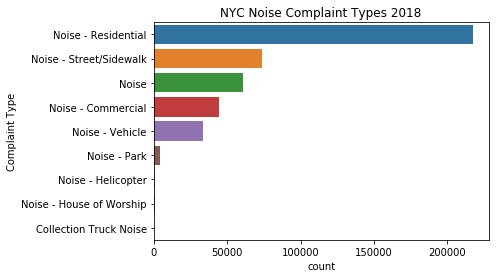

In [18]:
sns.countplot(y='Complaint Type',
              data=noise_complaints_data,
              order= noise_complaints_data['Complaint Type'].value_counts().index).set_title('NYC Noise Complaint Types 2018')

we are able to notice immediately that residential noise complaints top this list, having over 200,000 records. 
Once again, since we have 436,691 individual records, this means that over half of the them were due to residential complaints. 

# 2) What areas in NYC get the most noise complaints?

With the information we have we are able to categorize and locate the number of complaints by area. 

However, before we continue, one key assumption to remember is that the area with high noise complaints DOES NOT neccessarily mean that it is the noisest area

To explore this question, the focus will be on the **Borough**, **City**, and **Location Type**

## By Borough

In [19]:
#find unique borough names
noise_complaints_data['Borough'].unique()

array(['BROOKLYN', 'QUEENS', 'Unspecified', 'BRONX', 'MANHATTAN',
       'STATEN ISLAND'], dtype=object)

In [20]:
#group count of complaints by borough
count_borough = noise_complaints_data['Borough'].value_counts()
count_borough

MANHATTAN        133844
BROOKLYN         124434
BRONX             86572
QUEENS            79625
STATEN ISLAND     11126
Unspecified        1090
Name: Borough, dtype: int64

Text(0.5, 1.0, 'NYC Noise Complaints by Borough 2018')

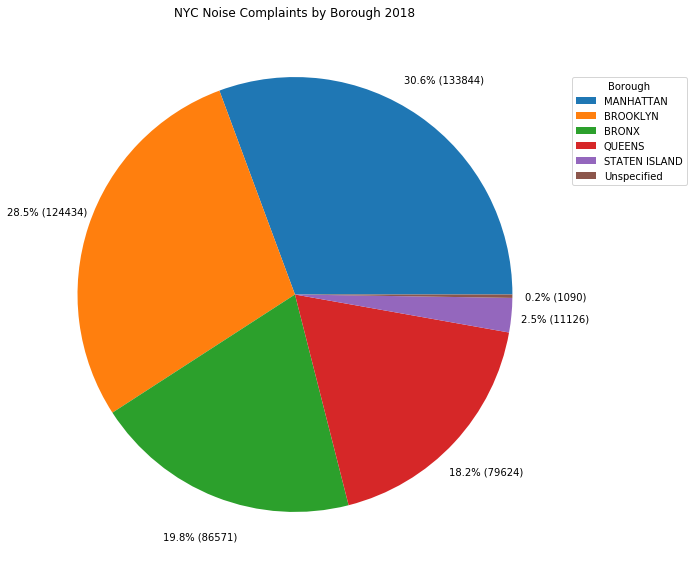

In [21]:
#create pie chart
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(aspect='equal'))

borough = list(count_borough.index)
count = list(count_borough)

def func(pct):
    absolute = int(pct/100.*np.sum(count))
    return "{:.1f}% ({:d})".format(pct, absolute)


ax.pie(count_borough, 
       autopct=lambda pct: func(pct),
      pctdistance=1.2)

ax.legend(borough,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0.3, 0.5, 1))

plt.title('NYC Noise Complaints by Borough 2018')

Of the five boroughs, Manhattan and Brooklyn take the top with Bronx and Queens coming next. Staten Island only takes a small proportion

0.2% (1090) unspecified items may be a combination of unidentified boroughs that have not been documented for whatever reason

## By City

In [22]:
noise_complaints_data['City'].unique()

array(['BROOKLYN', 'MASPETH', 'JAMAICA', 'FLUSHING', 'STATEN ISLAND',
       'BRONX', 'NEW YORK', 'QUEENS VILLAGE', 'ASTORIA', 'RIDGEWOOD',
       'ELMHURST', 'REGO PARK', 'ROCKAWAY PARK', 'SOUTH OZONE PARK',
       'WOODSIDE', 'FRESH MEADOWS', 'CORONA', 'BAYSIDE', 'COLLEGE POINT',
       'FOREST HILLS', 'SOUTH RICHMOND HILL', 'OAKLAND GARDENS',
       'RICHMOND HILL', 'LONG ISLAND CITY', 'OZONE PARK', 'WHITESTONE',
       'FAR ROCKAWAY', 'WOODHAVEN', 'ROSEDALE', 'HOLLIS', 'ARVERNE',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'SUNNYSIDE', 'EAST ELMHURST',
       'Rego Park', 'SAINT ALBANS', 'Little Neck', 'Ridgewood',
       'Far Rockaway', 'HOWARD BEACH', 'Astoria', nan, 'CAMBRIA HEIGHTS',
       'SPRINGFIELD GARDENS', 'Richmond Hill', 'Middle Village',
       'Woodside', 'Long Island City', 'Oakland Gardens',
       'Cambria Heights', 'BELLEROSE', 'Sunnyside', 'Flushing', 'Corona',
       'Jackson Heights', 'Elmhurst', 'Jamaica', 'Ozone Park',
       'MIDDLE VILLAGE', 'FLORAL PARK', 'F

In [23]:
comp_city = (noise_complaints_data['City'].value_counts())

In [24]:
comp_city_df = comp_city.to_frame().reset_index()
comp_city_df.rename(columns={'index':'City Name'},inplace=True)
comp_city_df.rename(columns={'City':'Count'},inplace=True)
comp_city_df.head(10)

,City Name,Count
0,NEW YORK,133663
1,BROOKLYN,124341
2,BRONX,86499
3,STATEN ISLAND,11477
4,JAMAICA,8882
5,ASTORIA,6641
6,RIDGEWOOD,4591
7,FRESH MEADOWS,4286
8,FLUSHING,3602
9,CORONA,3263


Text(0.5, 1.0, 'Top 10 NYC Noise Compaints by City 2018')

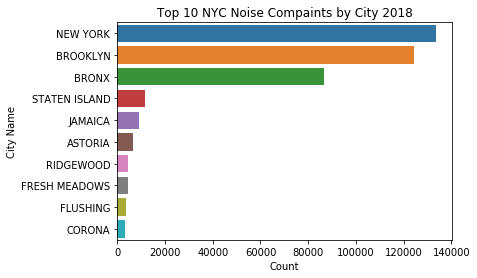

In [25]:
sns.barplot(x='Count',
            y='City Name',
            data=comp_city_df.head(10)).set_title('Top 10 NYC Noise Compaints by City 2018')

Similar information can be found as when we explored count of complaints by borough. 

However, it seems that Queens is broken down into a great variety of city names

## By Location Type

In [26]:
noise_complaints_data['Location Type'].value_counts()

Residential Building/House    217199
Street/Sidewalk               108003
Store/Commercial               26180
Club/Bar/Restaurant            18506
Park/Playground                 4237
Above Address                   1033
House of Worship                 753
Sidewalk                         171
Name: Location Type, dtype: int64

Text(0.5, 1.0, 'NYC Noise Complaints by Location Type 2018')

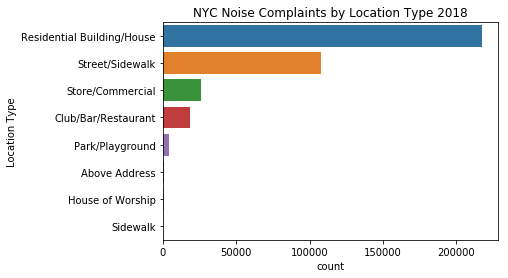

In [27]:
sns.countplot(y='Location Type',
              data=noise_complaints_data,
              order= noise_complaints_data['Location Type'].value_counts().index).set_title('NYC Noise Complaints by Location Type 2018')

Complaints from residential areas account for over half of the noise complaints

## Plot Map

In an attempt to identify geographical patterns of reported complaints, we will use the longitude and latitude points to create rough plots

In [28]:
#find maximum and minimum longitude
print(noise_complaints_data['Longitude'].max())
print(noise_complaints_data['Longitude'].min())

-73.70120788711537
-74.25313378651269


In [29]:
#find maximum and minimum latitude
print(noise_complaints_data['Latitude'].max())
print(noise_complaints_data['Latitude'].min())

40.912868795316655
40.49967332981336


Text(0.5, 1.0, 'NYC Noise Complaints 2018')

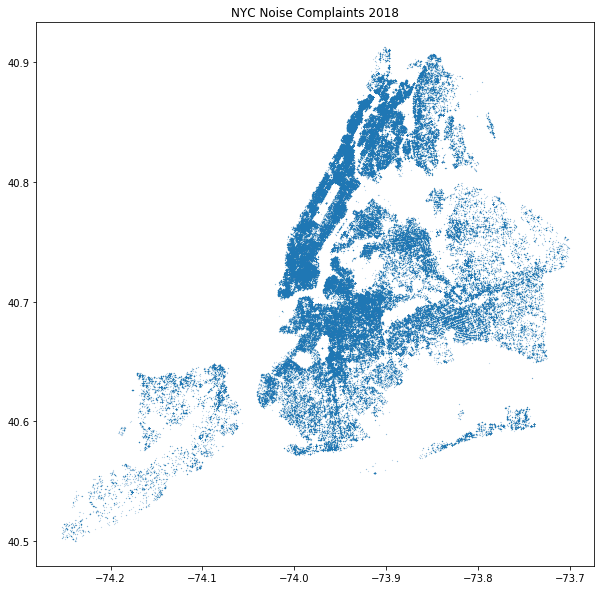

In [30]:
#plot complaints

#resize plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.plot(noise_complaints_data['Longitude'],noise_complaints_data['Latitude'],'.',markersize=0.2)
plt.title('NYC Noise Complaints 2018')

Each point in this plot is a reported noise complaint. Darker spots of the plot indicate high volume of complaints. 
We can almost see a visible map of New York City with Manhattan and Brooklyn having the most defined outline. 

Let's take a closer look at the top 4 boroughs

Text(0.5, 1.0, 'Queens Noise Complaints 2018')

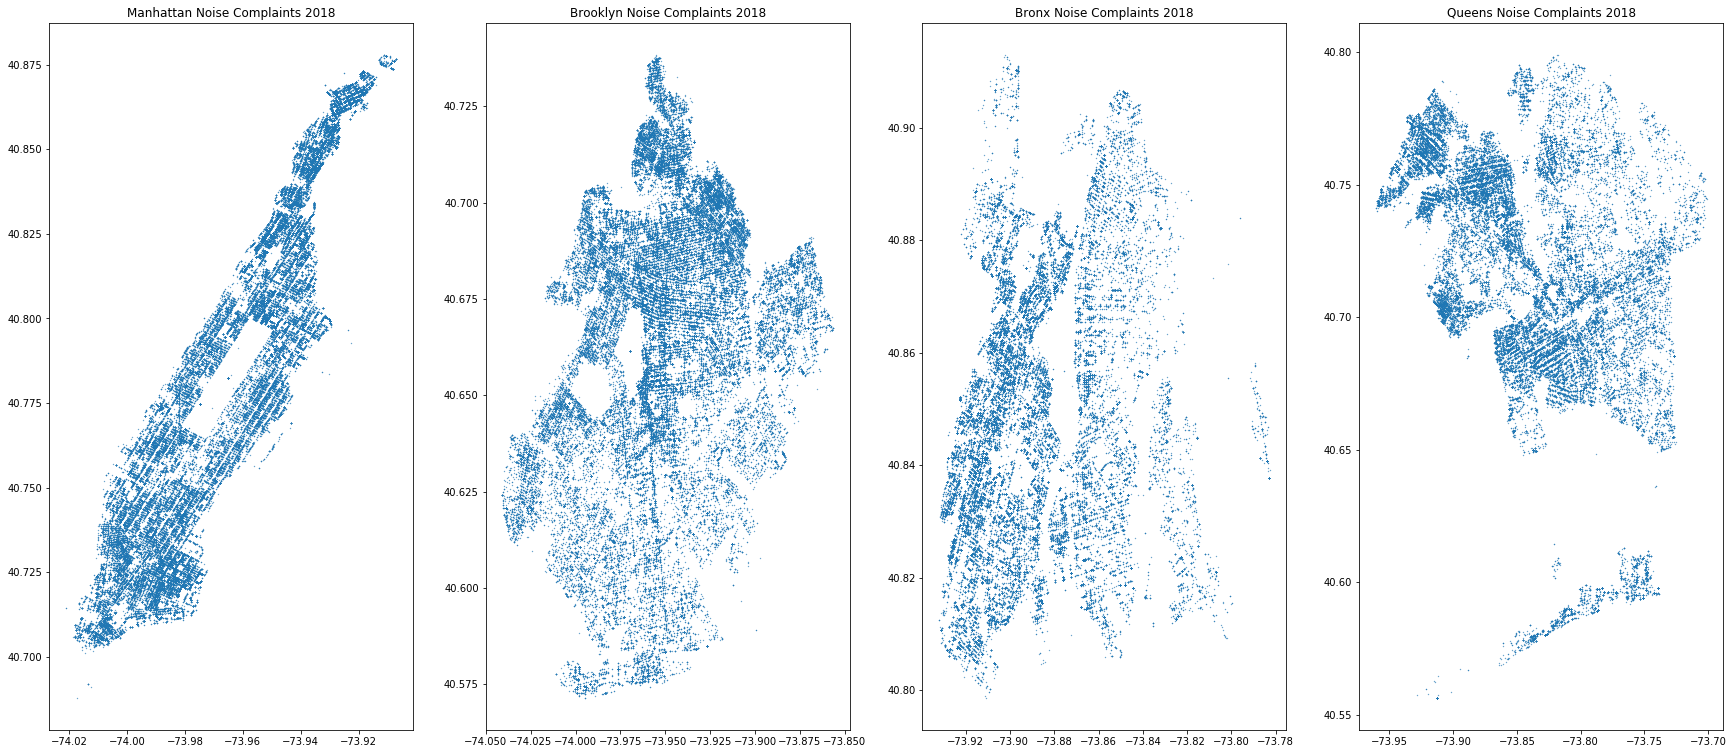

In [31]:
#closer look at Manhattan, Brooklyn, Bronx, Queens

#resize plot
from pylab import rcParams
rcParams['figure.figsize'] = 30, 13

#create subplot 
fig, axes = plt.subplots(nrows=1,ncols=4)

#filter boroughs
noise_complaints_manhattan= noise_complaints_data[noise_complaints_data['Borough']=='MANHATTAN']
noise_complaints_brooklyn= noise_complaints_data[noise_complaints_data['Borough']=='BROOKLYN']
noise_complaints_bronx= noise_complaints_data[noise_complaints_data['Borough']=='BRONX']
noise_complaints_queens= noise_complaints_data[noise_complaints_data['Borough']=='QUEENS']

#plot
axes[0].plot(noise_complaints_manhattan['Longitude'],noise_complaints_manhattan['Latitude'],'.',markersize=0.6)
axes[0].set_title('Manhattan Noise Complaints 2018')

axes[1].plot(noise_complaints_brooklyn['Longitude'],noise_complaints_brooklyn['Latitude'],'.',markersize=0.6)
axes[1].set_title('Brooklyn Noise Complaints 2018')

axes[2].plot(noise_complaints_bronx['Longitude'],noise_complaints_bronx['Latitude'],'.',markersize=0.6)
axes[2].set_title('Bronx Noise Complaints 2018')

axes[3].plot(noise_complaints_queens['Longitude'],noise_complaints_queens['Latitude'],'.',markersize=0.6)
axes[3].set_title('Queens Noise Complaints 2018')


In [33]:
#show geographical heatmap; show only 30000 datpoints due to memory limit

head = noise_complaints_data.head(30000)

import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(head[['Latitude','Longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

With each of the four boroughs broken down, we can see that noise complaints cluster around certain neighborhoods

For example, in Manhattan, there seems to be a lot of noise complaints around East Village and Lower East side. We also see dark shades in the area above central park (Harlem, Washington Heights, Fort George, etc). 

Meanwhile, it's interesting to note that areas of midtown which include popular tourist attractions such as Times Square and Rockfeller Center do not have as much complaints reported as other zones in the city. This may be due to the fact that these zones are not typical residential areas (thus less residential complaints)

For the other boroughs, we see that the dark shades are areas geographically close to Manhattan (Williamsburg for Brooklyn, Long Island City for Queens) 


In [34]:
#find maximum and minimum longitude
print(noise_complaints_data['Latitude'].mean())
print(noise_complaints_data['Longitude'].mean())

40.74841970725686
-73.92738708273353


# 3) When do most complaints occur?

In this section, we will explore to see if there are patterns in the volume of noise complaints by hour, day of the week, and by month. 

However, we must first prepare our date/time data to fit our needs

In [36]:
#check the current created date format
type(noise_complaints_data['Created Date'].iloc[0])

str

The created date column is currently in a string format so we should convert it to a date/time format for our convenience

In [37]:
#convert created date to date time format
noise_complaints_data['Created Date'] = pd.to_datetime(noise_complaints_data['Created Date'])

In [38]:
#create hour, month, day of week columns
noise_complaints_data['Hour'] = noise_complaints_data['Created Date'].apply(lambda time: time.hour)
noise_complaints_data['Month'] = noise_complaints_data['Created Date'].apply(lambda time: time.month)
noise_complaints_data['Day of Week'] = noise_complaints_data['Created Date'].apply(lambda time: time.dayofweek)

In [39]:
#check format of the day of the week column
noise_complaints_data['Day of Week'].head()

0    0
1    0
2    0
3    0
4    0
Name: Day of Week, dtype: int64

The day of the week column is currently set as integer values (0 = Monday, 1 = Tuesday,... 6 = Sunday) 

This is completely fine but we'll convert this to string values that we are more familar to seeing

In [40]:
#convert day of the week from integer to string descriptions
d_o_w = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
noise_complaints_data['Day of Week'] = noise_complaints_data['Day of Week'].map(d_o_w)

**By Hour**

Text(0.5, 1.0, 'NYC Count of Complaints 2018: by Hour')

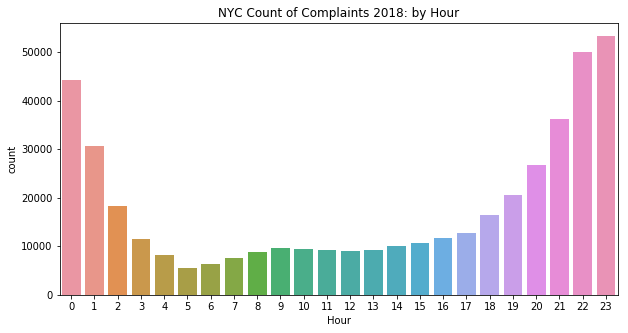

In [41]:
#plot count of complaints by time

#resize plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

sns.countplot(x=noise_complaints_data['Hour'])
plt.title('NYC Count of Complaints 2018: by Hour')

The complaints are counted by military hour. It makes sense that a large volume of these complaints were reported at night time (with high spikes around midnight) 

**By Day of Week**

Text(0.5, 1.0, 'NYC Count of Complaints 2018: by Day of Week')

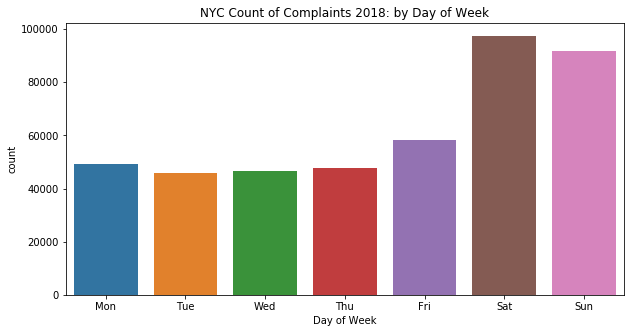

In [42]:
#plot count of complaints by day of week

sns.countplot(x=noise_complaints_data['Day of Week'])
plt.title('NYC Count of Complaints 2018: by Day of Week')

This time the complaints are counted by day of week. From this visualization, we may infer that higher volume of complaints are recorded during weekends compared to weekdays.

**By Month**

Text(0.5, 1.0, 'NYC Count of Complaints 2018: by Month')

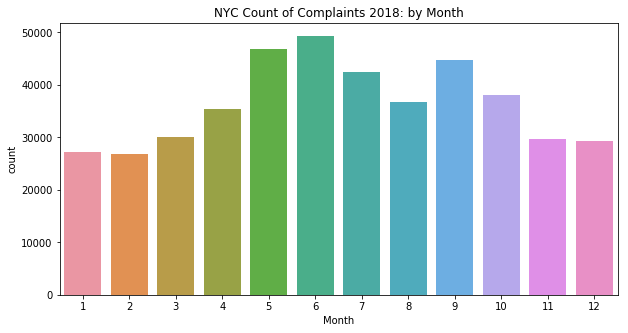

In [43]:
#plot count of complaints by month

sns.countplot(x=noise_complaints_data['Month'])
plt.title('NYC Count of Complaints 2018: by Month')

The following count plot shows us a potential seasonal trend when it comes to noise complaints in NYC. **Summer** months such as *May*, *June*, *July* have high records of complaints while **winter** months such as *November*, *December*, *January*, and *February* have lower counts compared to other months. 

Meanwhile, **fall** months such as *September* and *October* were also very hot for noise complaints

**By Date**

In [44]:
noise_complaints_data['Date'] = noise_complaints_data['Created Date'].apply(lambda t:t.date())

Text(0.5, 1.0, 'NYC Count of Complaints 2018: by Date')

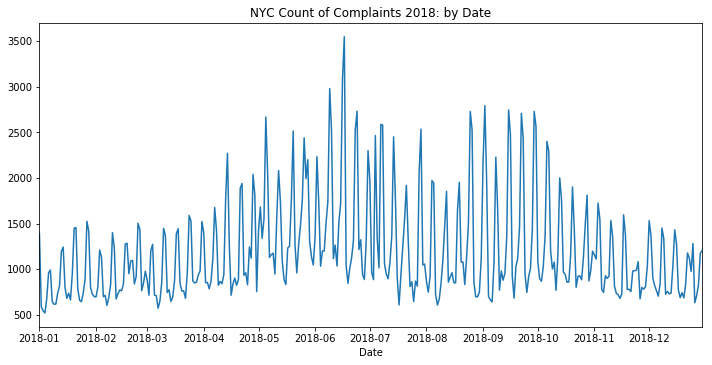

In [45]:
noise_complaints_data.groupby(noise_complaints_data['Date']).count()['Unique Key'].plot()
plt.tight_layout()
plt.title('NYC Count of Complaints 2018: by Date')

This visualization replicates information from the previous plot but with a time series-like presentation. 

Multiple factors that we have already looked at (seasonality, time of day, weekend/weekday) may have impacted the up and down spikes. 

**Date/Time Relationships**

Here we will explore relationships between our date/time variables for count of noise complaints

In [46]:
#create data frame of count of complaints on day of week vs hour
dayHour = noise_complaints_data.groupby(by=['Day of Week','Hour']).count()['Unique Key'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,4508,2787,1636,1043,800,614,921,1059,998,1036,...,1138,1292,1388,1637,2273,2875,3955,5605,8217,10132
Mon,4961,3036,1682,1146,871,687,915,1047,997,998,...,1134,1241,1443,1519,2054,2514,3222,4416,5709,5174
Sat,9403,6424,3854,2403,1757,1033,792,1459,2512,2656,...,2352,2438,2486,2749,3192,3977,5212,7670,11714,14760
Sun,14157,11155,6761,4055,2598,1374,903,937,1183,1658,...,2108,2237,2434,2685,2993,3634,4456,5544,7002,6502
Thu,4070,2537,1473,914,699,593,882,1015,1008,1068,...,1175,1123,1273,1325,2013,2476,3388,4490,6192,6164
Tue,3749,2456,1531,1055,788,627,993,1096,1070,1111,...,1105,1185,1293,1443,1882,2361,3173,4093,5460,4976
Wed,3477,2374,1422,921,686,607,873,1060,958,1099,...,1071,1199,1333,1452,2069,2633,3247,4512,5827,5647


Text(0.5, 1.0, 'NYC Count of Complaints 2018: Day of Week vs. Hour')

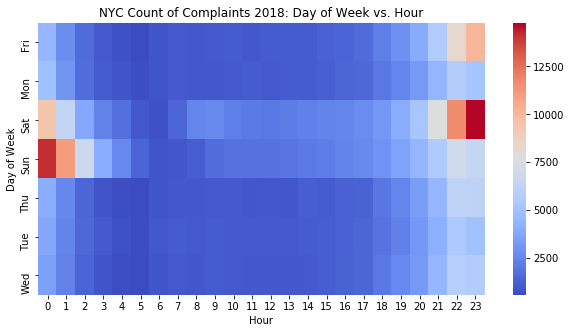

In [47]:
#create heatmap of count of complaints on day of week vs hour
sns.heatmap(data=dayHour,cmap='coolwarm')
plt.title('NYC Count of Complaints 2018: Day of Week vs. Hour')

We already noted that large volume of complaints were recorded during weekends and night time and this heatmap confirms just that. 

It also seems that lower number of noise complaints were recorded during weekday business hours

In [48]:
#create data frame of count of complaints on month vs hour
monthDay = noise_complaints_data.groupby(by=['Month','Day of Week']).count()['Unique Key'].unstack()
monthDay

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,3333,4415,5125,5104,2656,3263,3239
2,3388,3082,5387,5084,2986,3378,3446
3,4387,3173,7147,5610,3839,3092,2833
4,4902,4074,7876,7836,3870,3516,3356
5,6125,5675,8958,8305,6044,5723,6099
6,7439,4401,13123,10530,5024,4629,4185
7,4727,4787,9021,10183,4517,4353,4937
8,5478,3511,7808,8277,4325,3294,4023
9,5347,4581,12575,11933,3729,3107,3485


Text(0.5, 1.0, 'NYC Count of Complaints 2018: Day of Week vs. Month')

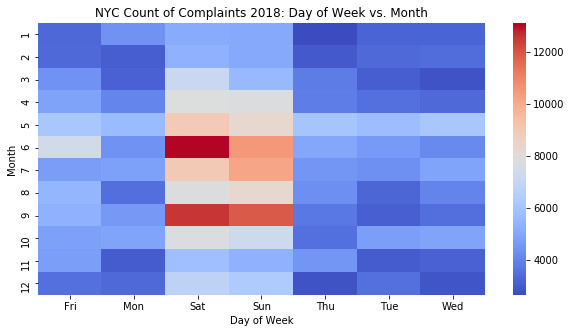

In [49]:
#create heatmap of count of complaints on month vs hour
sns.heatmap(data=monthDay,cmap='coolwarm')
plt.title('NYC Count of Complaints 2018: Day of Week vs. Month')

Here we see a possible combination of seasonality and weekday/weekend being factors. 

Weekends during Spring, Summer, and Fall months recorded more complaints than other times.  

**Conclusion**

This marks the end of this notebook!

Thanks for reading and feel free to leave any comments and suggestions regarding this EDA